<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:skyblue;overflow:hidden"><b>Titanic-Machine Learning From Disaster End To End Project</b></div>

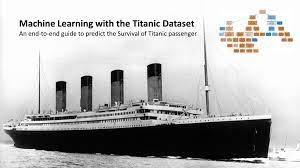

# IMPORTING LIBRARIES

In [1]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Stastics
from scipy import stats as st
import pylab

# Warnings
sns

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix , r2_score


# Loading : Datasets

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

# Description of Dataset

> * **PassengerId:** This feature indicates the Id of each passengers.
> * **Survived:** this features indicates whether the passenger has survived or not. **0 means Not- Survived** & **1 means Survived**
> * **pclass:** A proxy for socio-economic status (SES) **1st = Upper**, **2nd = Middle**, **3rd = Lower**
> * **Name:** This feature is indicating the names of individual passengers.
> * **Sex:** This feature is indicating the gender of the passengers.
> * **age:** this feature is indicating the age of individual passengers.
> * **sibsp:** The dataset defines family relations in this way...**Sibling** = brother, sister, stepbrother, stepsister,  **Spouse** = husband, wife (mistresses and fiancés were ignored)
> * **parch:** The dataset defines family relations in this way... **Parent:** = mother, father, **Child:** = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them.
> * **Ticket:** This feature is showing the Ticket Number of each passengers.
> * **Fare:** The amount paid by the passenger to get the Ticket.
> * **Cabin:** This feature is indicating the cabin deck & number of individual passengers.
> * **Embarked:** Embarked implies where the traveler mounted from. There are three possible values for Embark — **Southampton, Cherbourg, and Queenstown**. More than **70% of the people boarded from Southampton**

# some basic understanding of Data

1) SHOWING TRAIN AND TEST DATA

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


2) SHAPE OF TRAIN AND TEST DATA

In [5]:
print("The shape of training data:",train.shape)
print("The shape of testing data:",test.shape)

The shape of training data: (891, 12)
The shape of testing data: (418, 11)


3) Basic info of Training & Testing Data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


4) Descriptive Statistical Analysis of Numerical Features on Training Data.

In [8]:
train.describe(percentiles=[0.25,0.50,0.55,0.60,0.65,0.70,0.75,0.80]).T

,count,mean,std,min,25%,50%,55%,60%,65%,70%,75%,80%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,490.5,535.0000,579.5,624.0,668.5,713.0000,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,0.0,0.0000,1.0,1.0,1.0,1.0000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000,3.0,3.0,3.0,3.0000,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,30.0,31.8000,34.0,36.0,38.0,41.0000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,0.0,0.0000,0.0,1.0,1.0,1.0000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,1.0000,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,16.1,21.6792,26.0,27.0,31.0,39.6875,512.3292


5) Cardinality of Training & Testing data

In [9]:
print("Cardinality of Categorical Features in Training Data is:")
print(train.select_dtypes("object").nunique())
# print("\n"+"-"*100)
print("\nCardinality of categorical Featuress in testing Data is:")
print(test.select_dtypes("object").nunique())

Cardinality of Categorical Features in Training Data is:
Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

Cardinality of categorical Featuress in testing Data is:
Name        418
Sex           2
Ticket      363
Cabin        76
Embarked      3
dtype: int64


6) checking null values in Training and Testing Data

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df = train.isnull().sum()[train.isnull().sum()>0].to_frame().rename(columns={0:"Number of Missing Values"})
df["% of Missing Values"] = round(df["Number of Missing Values"]*100/len(train),2)
df

,Number of Missing Values,% of Missing Values
Age,177,19.87
Cabin,687,77.10
Embarked,2,0.22


In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
df = test.isnull().sum()[test.isnull().sum()>0].to_frame().rename(columns={0:"Number of Missing Values"})
df["% of Missing Values"] = round(df["Number of Missing Values"]*100/len(test),2)
df

,Number of Missing Values,% of Missing Values
Age,86,20.57
Fare,1,0.24
Cabin,327,78.23


---
---

# EXPLORATORY  DATA  ANALYSIS  ON TRAINING AND TESTING DATA

# VISUALIZATION

1) visualizing Target Data

In [14]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [16]:
train["Survived"].replace({0:"Not-Survived",1:"Survived"},inplace=True)

In [17]:
d=train['Survived'].value_counts().to_frame()

In [18]:
d

,Survived
Not-Survived,549
Survived,342


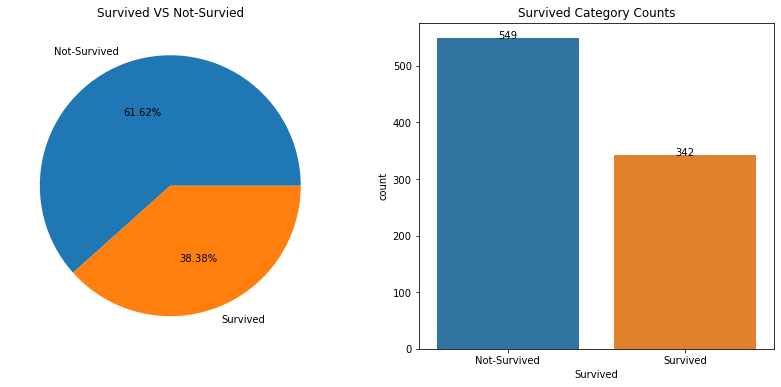

In [19]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(d.values.ravel(),labels=d.index,autopct="%0.2f%%")
plt.title('Survived VS Not-Survied')


plt.subplot(1,2,2)
sns.countplot(train['Survived'] )
plt.title('Survived Category Counts')

for i,j in enumerate(d["Survived"]):
    plt.text(i,j,j,ha="center")

plt.show()

2) Visualizing pclass feature

In [20]:
train["Pclass"].replace({1:"Upper_Class",2:"Middle_Class",3:"Lower_Class"},inplace=True)
test["Pclass"].replace({1:"Upper_Class",2:"Middle_Class",3:"Lower_Class"},inplace=True)

In [21]:
z=train['Pclass'].value_counts().to_frame()

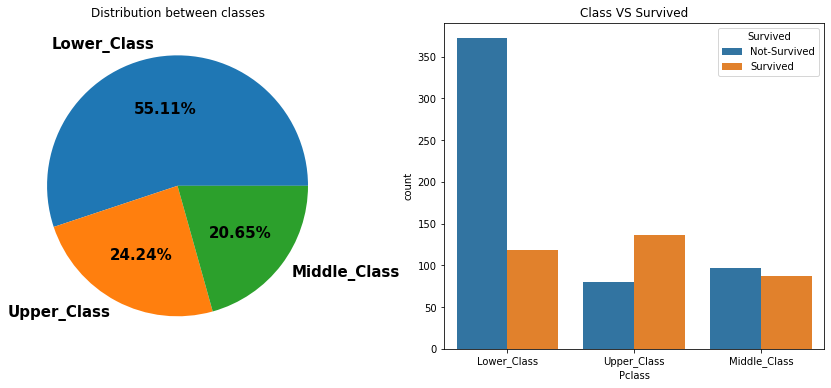

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Distribution between classes')
plt.pie(z.values.ravel(),labels= z.index,autopct="%0.2f%%",textprops={"fontweight":"black","size":15})


plt.subplot(1,2,2)
plt.title('Class VS Survived')
sns.countplot(train['Pclass'],hue=train['Survived'],data=train)

plt.show()

3) visualizing Sex feature

In [23]:
a=train['Sex'].value_counts().to_frame()
a

,Sex
male,577
female,314


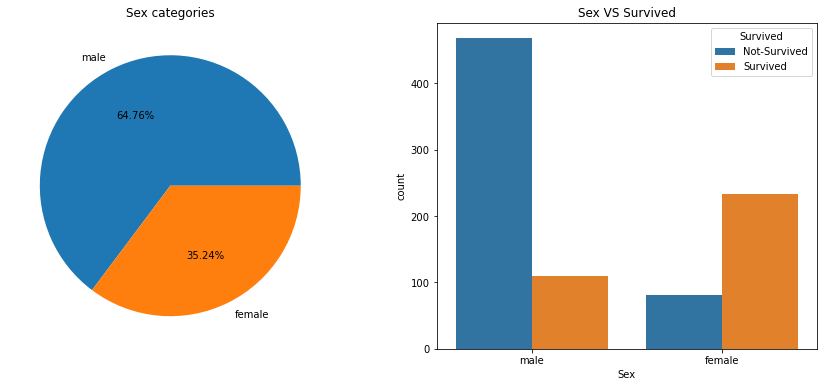

In [24]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.pie(a.values.ravel(),labels=a.index,autopct="%0.2f%%")
plt.title("Sex categories")

plt.subplot(1,2,2)
sns.countplot(train['Sex'],hue='Survived',data=train)
plt.title('Sex VS Survived')


plt.show()

4) Visualizing Age Feature

In [25]:
train['Age'].head().to_frame()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


Plotting Histogram 

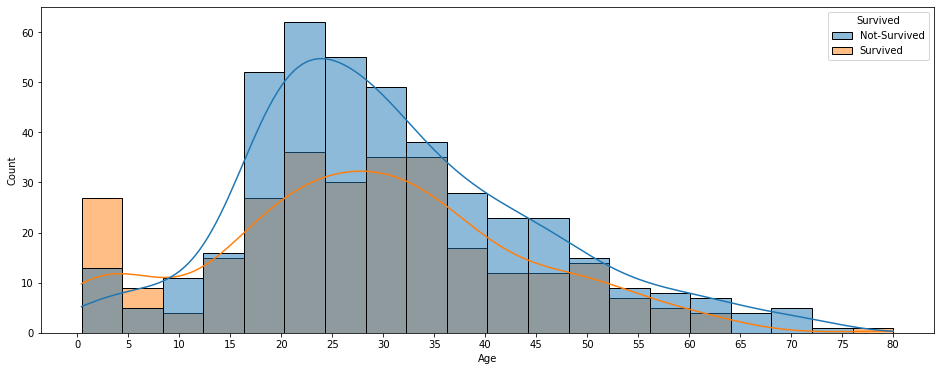

In [26]:
plt.figure(figsize=(16,6))
sns.histplot(x='Age',hue=train['Survived'],data=train,kde=True)
plt.xticks(list(range(0,81,5)))
plt.show()

0-10 age people will be mostly survived

11-65 age people will be mostly Not Survived 

above 65 age people will neligible to survived

5) Visualizing sibsp feature

In [27]:
s=train['SibSp'].value_counts().to_frame()
s

,SibSp
0,608
1,209
2,28
4,18
3,16
8,7
5,5


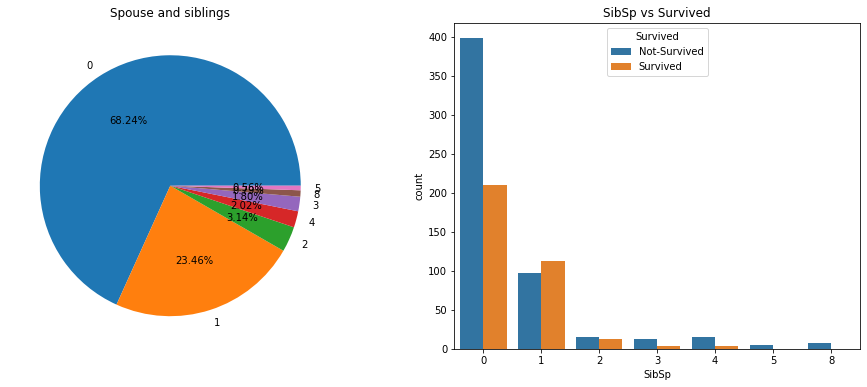

In [28]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.pie(s.values.ravel(),labels=s.index,autopct="%0.2f%%")
plt.title("Spouse and siblings")

plt.subplot(1,2,2)
sns.countplot(x="SibSp",hue="Survived",data=train)
plt.title("SibSp vs Survived")
plt.show()


plt.show()

Observation

💡 From piechart we can observe that most of the passenger are travelling without any sibling or spouse

💡 From coutplot we can observe following things:

Passengers travelling with 0 sibling/spouse have almost chance of Survival

Passengers travelling with 1 sibling/spouse have high chance of Survival

Passengers travelling with 2 sibling/spouse have almost equal chance of Survival

Passengers travelling with more than 2 sibling/spouse have almost negligible chance of Survival

6) Visualizing- Parch(parents or childs) Feature 

In [29]:
train["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [30]:
y = train["Parch"].value_counts().to_frame()
y

,Parch
0,678
1,118
2,80
3,5
5,5
4,4
6,1


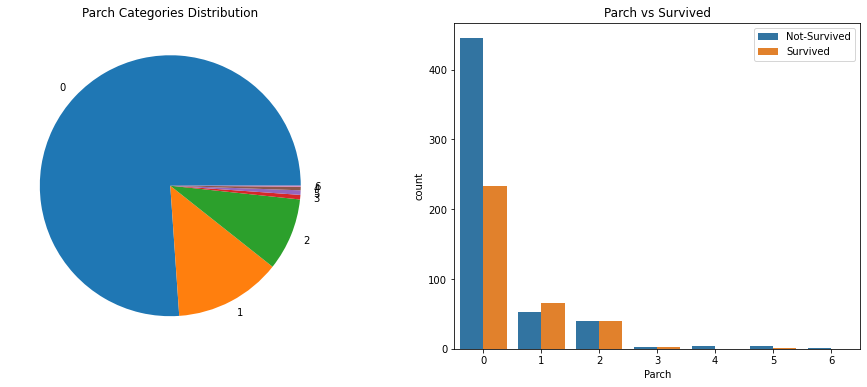

In [31]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.pie(y["Parch"],labels=y.index.tolist())
plt.title("Parch Categories Distribution")

plt.subplot(1,2,2)
sns.countplot(x="Parch",hue="Survived",data=train)
plt.title("Parch vs Survived")
plt.legend(loc="upper right")
plt.show()

Observation

💡 From pie-chart we can easily observe that almost 80% of passengers are travelling with their parents or childrens.

💡 From countplot we can observe following things

If the passengers is travelling with 0 parent/children than they have almost half chance of Survival

If the passengers is travelling with 1 or 2 parent/children than they have almost equal chane of Survival

We can't make any observation for passengers travelling with more than 2 parent/children because there are very few datapoints.

7) Visualizing Fare Feature

In [32]:
train["Fare"].head().to_frame()

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500


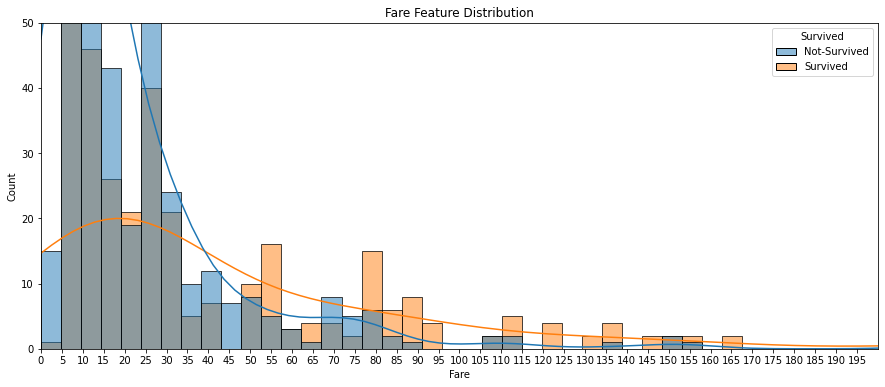

In [33]:
plt.figure(figsize=(15,6))
sns.histplot(x="Fare",hue="Survived",data=train,kde=True)
plt.title("Fare Feature Distribution")
plt.ylim(0,50)
plt.xlim(0,200)
plt.xticks(list(range(0,200,5)))
plt.show()

Observation

💡 Passengers having Fare charge between 0 to 5 are having almost negligible chance of Survival when compared with Non Survived

💡 Passengers having Fare charge between 6 to 40 are having almost equal chance of Survival when comapred with Non Survived

💡 Passengers having Fare charge greater than 50 are having very high chance of Survival when comparedd with Non Survived

8) Visualizing- Embarked Feature

In [34]:
# EMABARKED Embarked implies where the traveler mounted from.
# 💡 There are three possible values for Embark — S for Southampton, C for Cherbourg, and Q for Queenstown.

z = train["Embarked"].value_counts().to_frame()
z

,Embarked
S,644
C,168
Q,77


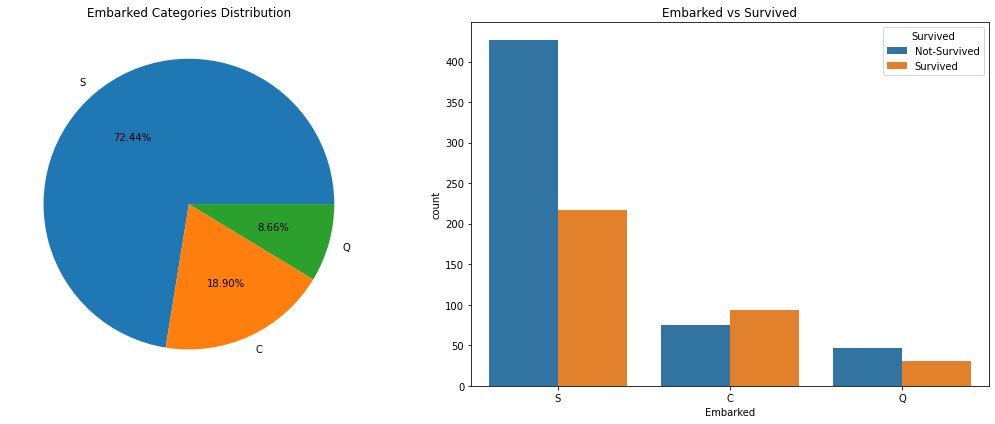

In [35]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.pie(z["Embarked"],labels=z.index.tolist(),autopct="%0.2f%%")
plt.title("Embarked Categories Distribution")

plt.subplot(1,2,2)
sns.countplot(x="Embarked",hue="Survived",data=train)
plt.title("Embarked vs Survived")
plt.tight_layout()
plt.show()

9) MultiFeature Analysis

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

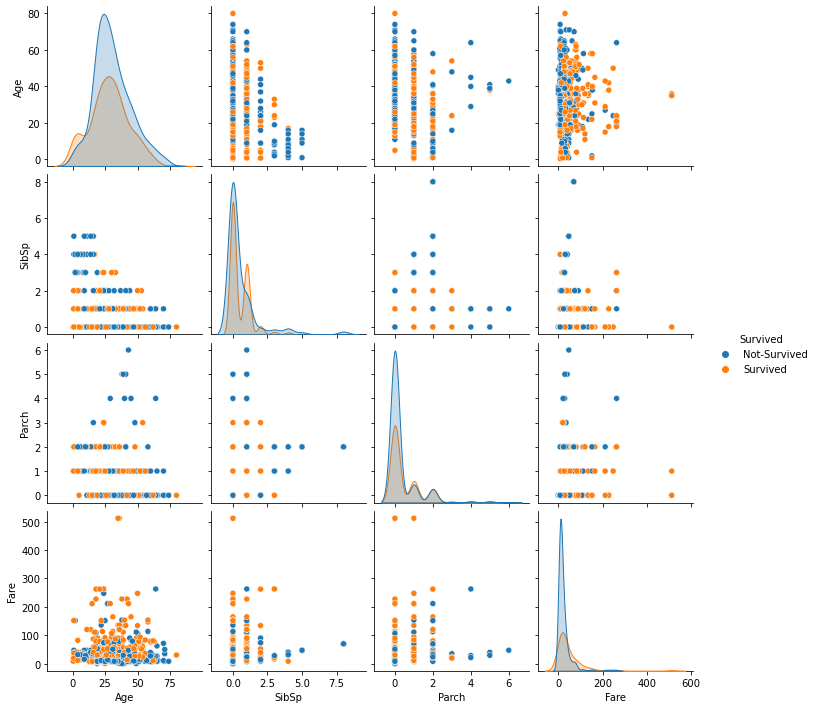

In [36]:
sns.pairplot(train.drop(columns="PassengerId"),hue="Survived")
plt.show()

# DATA PREPROCESSING ON TRAINIG & TESTING DATA

1) Filling null values

In [37]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
train['Age'].mean()

29.69911764705882

In [39]:
train['Age']=train['Age'].fillna(train['Age'].mean())

In [40]:
train.drop(columns=['Cabin'],inplace=True)

In [41]:
train['Embarked'].mode()

0    S
dtype: object

In [42]:
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

In [43]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

now train data is ready for further process

now same process for teat data

In [44]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [45]:
test.drop(columns=['Cabin'],inplace=True)

In [46]:
test['Age'].mean()

30.272590361445783

In [47]:
test['Age']=test['Age'].fillna(test['Age'].mean())

In [48]:
test['Fare'].mean()

35.6271884892086

In [49]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [50]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

 now your test data is also clean

In [51]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,Not-Survived,Lower_Class,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,Survived,Upper_Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,Survived,Lower_Class,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,Survived,Upper_Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,Not-Survived,Lower_Class,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,Not-Survived,Middle_Class,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,Survived,Upper_Class,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,Not-Survived,Lower_Class,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,Survived,Upper_Class,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


# 2) Drop useless features from both train and test data 

In [52]:
train.drop(columns=['Name','Ticket'],inplace=True)

In [53]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,Not-Survived,Lower_Class,male,22.000000,1,0,7.2500,S
1,2,Survived,Upper_Class,female,38.000000,1,0,71.2833,C
2,3,Survived,Lower_Class,female,26.000000,0,0,7.9250,S
3,4,Survived,Upper_Class,female,35.000000,1,0,53.1000,S
4,5,Not-Survived,Lower_Class,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,Not-Survived,Middle_Class,male,27.000000,0,0,13.0000,S
887,888,Survived,Upper_Class,female,19.000000,0,0,30.0000,S
888,889,Not-Survived,Lower_Class,female,29.699118,1,2,23.4500,S
889,890,Survived,Upper_Class,male,26.000000,0,0,30.0000,C


In [54]:
test.drop(columns=['Name','Ticket'],inplace=True)

In [55]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,Lower_Class,male,34.50000,0,0,7.8292,Q
1,893,Lower_Class,female,47.00000,1,0,7.0000,S
2,894,Middle_Class,male,62.00000,0,0,9.6875,Q
3,895,Lower_Class,male,27.00000,0,0,8.6625,S
4,896,Lower_Class,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,Lower_Class,male,30.27259,0,0,8.0500,S
414,1306,Upper_Class,female,39.00000,0,0,108.9000,C
415,1307,Lower_Class,male,38.50000,0,0,7.2500,S
416,1308,Lower_Class,male,30.27259,0,0,8.0500,S


3) do label encoding in Embarked and sex column in both training and testing data 

In [56]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [57]:
train.replace({'male':0,'female':1},inplace = True)

In [58]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,Not-Survived,Lower_Class,0,22.000000,1,0,7.2500,S
1,2,Survived,Upper_Class,1,38.000000,1,0,71.2833,C
2,3,Survived,Lower_Class,1,26.000000,0,0,7.9250,S
3,4,Survived,Upper_Class,1,35.000000,1,0,53.1000,S
4,5,Not-Survived,Lower_Class,0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,Not-Survived,Middle_Class,0,27.000000,0,0,13.0000,S
887,888,Survived,Upper_Class,1,19.000000,0,0,30.0000,S
888,889,Not-Survived,Lower_Class,1,29.699118,1,2,23.4500,S
889,890,Survived,Upper_Class,0,26.000000,0,0,30.0000,C


In [59]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [60]:
train.replace({'S':0,'C':1,'Q':2},inplace = True)

In [61]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,Not-Survived,Lower_Class,0,22.000000,1,0,7.2500,0
1,2,Survived,Upper_Class,1,38.000000,1,0,71.2833,1
2,3,Survived,Lower_Class,1,26.000000,0,0,7.9250,0
3,4,Survived,Upper_Class,1,35.000000,1,0,53.1000,0
4,5,Not-Survived,Lower_Class,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,Not-Survived,Middle_Class,0,27.000000,0,0,13.0000,0
887,888,Survived,Upper_Class,1,19.000000,0,0,30.0000,0
888,889,Not-Survived,Lower_Class,1,29.699118,1,2,23.4500,0
889,890,Survived,Upper_Class,0,26.000000,0,0,30.0000,1


now apply same process on test data

In [62]:
test['Sex'].unique()

array(['male', 'female'], dtype=object)

In [63]:
test.replace({'male':0,'female':1},inplace = True)

In [64]:
test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [65]:
test.replace({'S':0,'C':1,'Q':2},inplace = True)

In [66]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,Not-Survived,Lower_Class,0,22.000000,1,0,7.2500,0
1,2,Survived,Upper_Class,1,38.000000,1,0,71.2833,1
2,3,Survived,Lower_Class,1,26.000000,0,0,7.9250,0
3,4,Survived,Upper_Class,1,35.000000,1,0,53.1000,0
4,5,Not-Survived,Lower_Class,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,Not-Survived,Middle_Class,0,27.000000,0,0,13.0000,0
887,888,Survived,Upper_Class,1,19.000000,0,0,30.0000,0
888,889,Not-Survived,Lower_Class,1,29.699118,1,2,23.4500,0
889,890,Survived,Upper_Class,0,26.000000,0,0,30.0000,1


now see both train and test data

In [67]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,Not-Survived,Lower_Class,0,22.000000,1,0,7.2500,0
1,2,Survived,Upper_Class,1,38.000000,1,0,71.2833,1
2,3,Survived,Lower_Class,1,26.000000,0,0,7.9250,0
3,4,Survived,Upper_Class,1,35.000000,1,0,53.1000,0
4,5,Not-Survived,Lower_Class,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,Not-Survived,Middle_Class,0,27.000000,0,0,13.0000,0
887,888,Survived,Upper_Class,1,19.000000,0,0,30.0000,0
888,889,Not-Survived,Lower_Class,1,29.699118,1,2,23.4500,0
889,890,Survived,Upper_Class,0,26.000000,0,0,30.0000,1


In [68]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,Lower_Class,0,34.50000,0,0,7.8292,2
1,893,Lower_Class,1,47.00000,1,0,7.0000,0
2,894,Middle_Class,0,62.00000,0,0,9.6875,2
3,895,Lower_Class,0,27.00000,0,0,8.6625,0
4,896,Lower_Class,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,Lower_Class,0,30.27259,0,0,8.0500,0
414,1306,Upper_Class,1,39.00000,0,0,108.9000,1
415,1307,Lower_Class,0,38.50000,0,0,7.2500,0
416,1308,Lower_Class,0,30.27259,0,0,8.0500,0


3) Doing label encoding the feature in both training and testing dataset

In [69]:
train["Survived"].replace({"Not-Survived":0,"Survived":1},inplace=True)

In [70]:
train["Pclass"].replace({"Lower_Class":0,"Middle_Class":1,"Upper_Class":2},inplace=True)

In [71]:
test["Pclass"].replace({"Lower_Class":0,"Middle_Class":1,"Upper_Class":2},inplace=True)

In [72]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,0,0,22.000000,1,0,7.2500,0
1,2,1,2,1,38.000000,1,0,71.2833,1
2,3,1,0,1,26.000000,0,0,7.9250,0
3,4,1,2,1,35.000000,1,0,53.1000,0
4,5,0,0,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,1,0,27.000000,0,0,13.0000,0
887,888,1,2,1,19.000000,0,0,30.0000,0
888,889,0,0,1,29.699118,1,2,23.4500,0
889,890,1,2,0,26.000000,0,0,30.0000,1


In [73]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,0,34.50000,0,0,7.8292,2
1,893,0,1,47.00000,1,0,7.0000,0
2,894,1,0,62.00000,0,0,9.6875,2
3,895,0,0,27.00000,0,0,8.6625,0
4,896,0,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,0,0,30.27259,0,0,8.0500,0
414,1306,2,1,39.00000,0,0,108.9000,1
415,1307,0,0,38.50000,0,0,7.2500,0
416,1308,0,0,30.27259,0,0,8.0500,0


In [74]:
nominal_data=['Sex','Embarked','Pclass','SibSp','Parch']
train = pd.get_dummies(columns=nominal_data, data=train)

In [75]:
train

,PassengerId,Survived,Age,Fare,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Pclass_0,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,22.000000,7.2500,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,2,1,38.000000,71.2833,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1,26.000000,7.9250,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,4,1,35.000000,53.1000,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,35.000000,8.0500,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,13.0000,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
887,888,1,19.000000,30.0000,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
888,889,0,29.699118,23.4500,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
889,890,1,26.000000,30.0000,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [76]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,0,34.50000,0,0,7.8292,2
1,893,0,1,47.00000,1,0,7.0000,0
2,894,1,0,62.00000,0,0,9.6875,2
3,895,0,0,27.00000,0,0,8.6625,0
4,896,0,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,0,0,30.27259,0,0,8.0500,0
414,1306,2,1,39.00000,0,0,108.9000,1
415,1307,0,0,38.50000,0,0,7.2500,0
416,1308,0,0,30.27259,0,0,8.0500,0


In [77]:
test = pd.get_dummies(columns=nominal_data, data=test)

In [78]:
test

,PassengerId,Age,Fare,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Pclass_0,Pclass_1,...,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,892,34.50000,7.8292,1,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,893,47.00000,7.0000,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,894,62.00000,9.6875,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,895,27.00000,8.6625,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,896,22.00000,12.2875,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,30.27259,8.0500,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
414,1306,39.00000,108.9000,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
415,1307,38.50000,7.2500,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
416,1308,30.27259,8.0500,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


4) Drop PassengerId column from both testing and training data 

In [79]:
train.drop(columns=['PassengerId'],inplace=True)

In [80]:
test.drop(columns=['PassengerId'],inplace=True)

In [81]:
train

,Survived,Age,Fare,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Pclass_0,Pclass_1,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,22.000000,7.2500,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1,38.000000,71.2833,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,26.000000,7.9250,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,35.000000,53.1000,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,35.000000,8.0500,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
887,1,19.000000,30.0000,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
888,0,29.699118,23.4500,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
889,1,26.000000,30.0000,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [82]:
test

,Age,Fare,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Pclass_0,Pclass_1,Pclass_2,...,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,34.50000,7.8292,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,47.00000,7.0000,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,62.00000,9.6875,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,27.00000,8.6625,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,22.00000,12.2875,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.27259,8.0500,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
414,39.00000,108.9000,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
415,38.50000,7.2500,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
416,30.27259,8.0500,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


5) Chanhing The Data Type of Age feature in both training and testing data

In [83]:
train['Age']=train['Age'].astype(int)

In [84]:
train

,Survived,Age,Fare,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Pclass_0,Pclass_1,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,22,7.2500,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1,38,71.2833,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,26,7.9250,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,35,53.1000,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,35,8.0500,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27,13.0000,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
887,1,19,30.0000,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
888,0,29,23.4500,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
889,1,26,30.0000,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [85]:
test['Age']=test['Age'].astype(int)

In [86]:
test

,Age,Fare,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Pclass_0,Pclass_1,Pclass_2,...,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
0,34,7.8292,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,47,7.0000,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,62,9.6875,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,27,8.6625,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,22,12.2875,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,30,8.0500,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
414,39,108.9000,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
415,38,7.2500,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
416,30,8.0500,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


# Now Your Data Is Ready For Model Fitting & Make Predictions

1). Selecting Features & Labels For Model Training.

In [87]:
train.head()

,Survived,Age,Fare,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Pclass_0,Pclass_1,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,22,7.2500,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1,38,71.2833,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,26,7.9250,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,35,53.1000,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,35,8.0500,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


2) choosing independent and dependent for Model

In [88]:
x=train.drop(columns=['Survived'])
y=train['Survived']

In [89]:
x.head()

,Age,Fare,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Pclass_0,Pclass_1,Pclass_2,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,22,7.2500,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,38,71.2833,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,26,7.9250,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,35,53.1000,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,35,8.0500,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [90]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

3) FEATURE SCALING

In [91]:
scaler=StandardScaler()

In [92]:
x_scaled=scaler.fit_transform(x)
test_scaled = scaler.fit_transform(test)

4) Splitting Data For Model Which Don't Need Scaled Data.

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [94]:
print(x_train.shape, y_train.shape)

(712, 24) (712,)


In [95]:
print(x_test.shape,y_test.shape)

(179, 24) (179,)


5) Splitting Data For Model Which Need Scaled Data.

In [96]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_scaled,y,test_size=0.2,random_state=2)

In [97]:
print(x_train1.shape, y_train1.shape)

(712, 24) (712,)


In [98]:
print(x_test1.shape, y_test1.shape)

(179, 24) (179,)


6) Model Building for Unscaled Data

In [99]:
training_score1=[]
testing_score1=[]

In [100]:
def model_pred_unscaled(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    a = accuracy_score(y_train,y_pred_train)*100
    b = accuracy_score(y_test,y_pred)*100
    a.astype(int)
    b.astype(int)
    training_score1.append(a)
    testing_score1.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,y_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,y_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,y_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    
    matrix= confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(matrix,annot=True,fmt="g",cmap="Set1")
    plt.show()

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 98.31460674157303
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 77.6536312849162

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.7671232876712328
Recall Score of DecisionTreeClassifier() model is: 0.7088607594936709
F1 Score of DecisionTreeClassifier() model is: 0.736842105263158

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


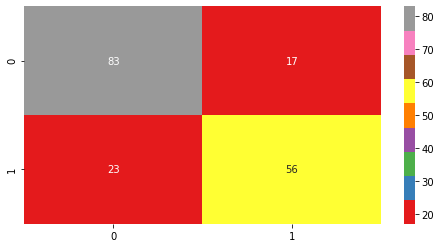

In [101]:
model_pred_unscaled(DecisionTreeClassifier())

Accuracy_Score of RandomForestClassifier() model on Training Data is: 98.31460674157303
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 79.3296089385475

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.8
Recall Score of RandomForestClassifier() model is: 0.7088607594936709
F1 Score of RandomForestClassifier() model is: 0.7516778523489933

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


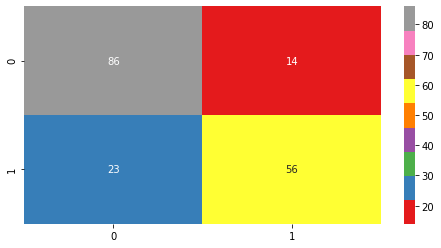

In [102]:
model_pred_unscaled(RandomForestClassifier())

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 85.1123595505618
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 75.97765363128491

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.78125
Recall Score of AdaBoostClassifier() model is: 0.6329113924050633
F1 Score of AdaBoostClassifier() model is: 0.6993006993006993

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


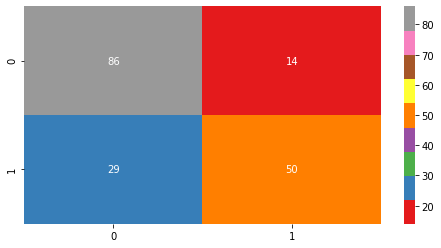

In [103]:
model_pred_unscaled(AdaBoostClassifier())

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 90.4494382022472
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 78.2122905027933

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.8448275862068966
Recall Score of GradientBoostingClassifier() model is: 0.620253164556962
F1 Score of GradientBoostingClassifier() model is: 0.7153284671532847

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


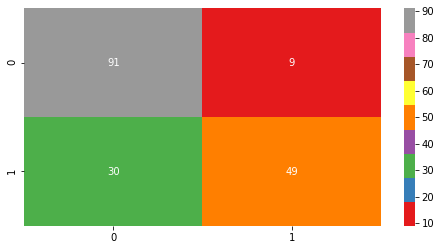

In [104]:
model_pred_unscaled(GradientBoostingClassifier())

7) Model Building for scaled Data

In [105]:
def model_pred_scaled(model):
    model.fit(x_train1,y_train1)
    y_pred1=model.predict(x_test1)
    y_pred_train1=model.predict(x_train1)
    a = accuracy_score(y_train1,y_pred_train1)*100
    b = accuracy_score(y_test1,y_pred1)*100
    a.astype(int)
    b.astype(int)
    training_score1.append(a)
    testing_score1.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test1,y_pred1))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,y_pred1))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,y_pred1))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    
    matrix= confusion_matrix(y_test1,y_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(matrix,annot=True,fmt="g",cmap="Set1")
    plt.show()

Accuracy_Score of LogisticRegression() model on Training Data is: 82.4438202247191
Accuracy_Score of LogisticRegression() model on Testing Data is: 77.6536312849162

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.8
Recall Score of LogisticRegression() model is: 0.6582278481012658
F1 Score of LogisticRegression() model is: 0.7222222222222222

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


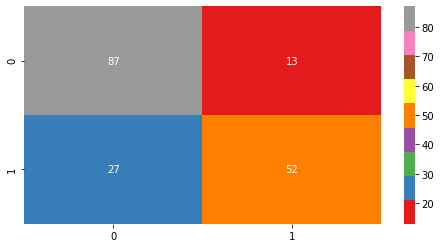

In [106]:
model_pred_scaled(LogisticRegression())

Accuracy_Score of KNeighborsClassifier() model on Training Data is: 84.8314606741573
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 75.41899441340783

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.8070175438596491
Recall Score of KNeighborsClassifier() model is: 0.5822784810126582
F1 Score of KNeighborsClassifier() model is: 0.6764705882352942

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


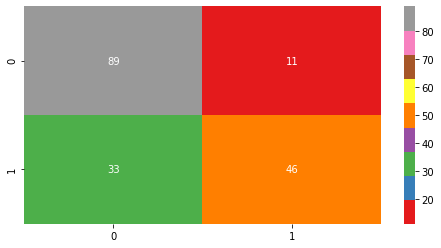

In [107]:
model_pred_scaled(KNeighborsClassifier())

Accuracy_Score of SVC() model on Training Data is: 86.09550561797754
Accuracy_Score of SVC() model on Testing Data is: 75.97765363128491

------------------------------------------------------------------------
Precision Score of SVC() model is: 0.875
Recall Score of SVC() model is: 0.5316455696202531
F1 Score of SVC() model is: 0.6614173228346456

------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


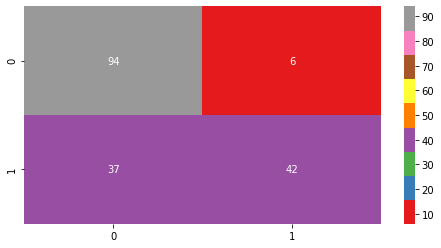

In [108]:
model_pred_scaled(SVC())

Accuracy_Score of GaussianNB() model on Training Data is: 40.87078651685393
Accuracy_Score of GaussianNB() model on Testing Data is: 46.36871508379888

------------------------------------------------------------------------
Precision Score of GaussianNB() model is: 0.4508670520231214
Recall Score of GaussianNB() model is: 0.9873417721518988
F1 Score of GaussianNB() model is: 0.6190476190476191

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


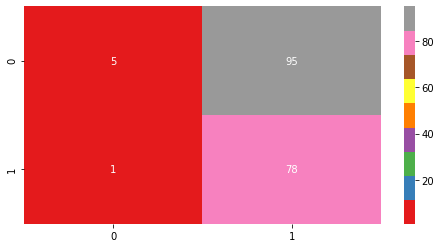

In [109]:
model_pred_scaled(GaussianNB())

In [110]:
training_score1

[98.31460674157303,
 98.31460674157303,
 85.1123595505618,
 90.4494382022472,
 82.4438202247191,
 84.8314606741573,
 86.09550561797754,
 40.87078651685393]

In [111]:
testing_score1

[77.6536312849162,
 79.3296089385475,
 75.97765363128491,
 78.2122905027933,
 77.6536312849162,
 75.41899441340783,
 75.97765363128491,
 46.36871508379888]

8) Showing Accuracy Of Machine Learning Models

In [112]:
MODEL=["Decision Tree","Random Forest","Ada Boost","GradientBoosting","Logistic Regression","KNN","SVM","Naive Bayes"]

In [113]:
df1=pd.DataFrame({"Models":MODEL,
                "Training_Score":training_score1,
                 "Testing_Score":testing_score1})

In [114]:
df1

,Models,Training_Score,Testing_Score
0,Decision Tree,98.314607,77.653631
1,Random Forest,98.314607,79.329609
2,Ada Boost,85.112360,75.977654
3,GradientBoosting,90.449438,78.212291
4,Logistic Regression,82.443820,77.653631
5,KNN,84.831461,75.418994
6,SVM,86.095506,75.977654
7,Naive Bayes,40.870787,46.368715


9) Plotting above results using column-bar chart.

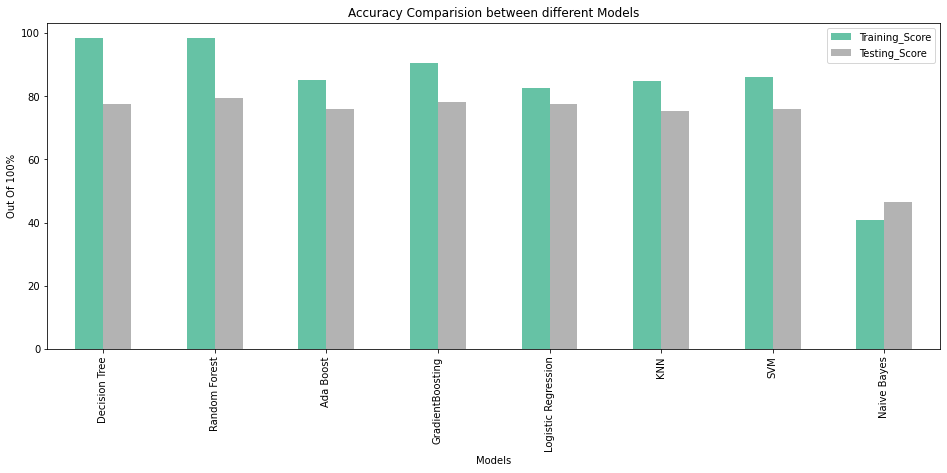

In [214]:
df1.plot(x='Models',y=['Training_Score','Testing_Score'],kind='bar',colormap="Set2",figsize=(16,6))
plt.title("Accuracy Comparision between different Models")
plt.xlabel("Models")
plt.ylabel("Out Of 100%")
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
    
💡 Highest performance was give by GradientBoosting approx 79%.<br>

💡 Second Highest performance was given by Random Forest approx 78%<br>

💡 So we will do Hyper-Parameter Tunning on these five Models.<br></div>

# HYPERPARAMETER TUNNING FOR INCREASING MODELS ACCURACY

1) Hyper parameter tunning for Decision Tree model

In [116]:
DT=DecisionTreeClassifier()

In [117]:
grid_param={
    'criterion':['gini','entriopy'],
    'splitter':['best','random'],
    'max_depth':range(1,20,1),
    'min_samples_split':range(1,10,1),
    'min_samples_leaf':range(4,10,1)    
}

In [118]:
grid_search=GridSearchCV(estimator=DT,param_grid=grid_param,cv=5,n_jobs=-1)

In [119]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entriopy'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(4, 10),
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']})

In [208]:
grid_search4.best_score_

0.8258150300403821

In [120]:
best_parameters = grid_search.best_params_
best_parameters

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 6,
 'min_samples_split': 9,
 'splitter': 'random'}

In [121]:
dt=DecisionTreeClassifier(criterion= 'gini',
 max_depth= 7,
 min_samples_leaf= 5,
 min_samples_split= 6,
 splitter= 'random')

In [122]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=6,
                       splitter='random')

In [123]:
y_pred=dt.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [124]:
y_pred_train=dt.predict(x_train)
y_pred_train

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [168]:
accuracy_score(y_test,y_pred)*100

78.77094972067039

In [126]:
accuracy_score(y_train,y_pred_train)*100

84.26966292134831

2) Hyper parameter tunning for Gradient Boosting model

In [127]:
model1 = GradientBoostingClassifier()

In [128]:
parameters1 = {'n_estimators': [100,300,500,550],
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6]}

In [129]:
grid_search = GridSearchCV(model1, parameters1, cv=5, n_jobs=-1)

In [130]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [100, 300, 500, 550]})

In [131]:
grid_search.best_score_

0.8159460258051808

In [207]:
grid_search.best_score_

0.8159460258051808

In [132]:
best_parameters1 = grid_search.best_params_
best_parameters1

{'max_depth': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 9,
 'n_estimators': 300}

In [133]:
gradientboost = GradientBoostingClassifier(**best_parameters1)

In [134]:
gradientboost.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=11, min_samples_leaf=5,
                           min_samples_split=9, n_estimators=300)

In [135]:
y_pred=gradientboost.predict(x_test)

In [136]:
y_pred_train=gradientboost.predict(x_train)

In [172]:
accuracy_score(y_test,y_pred)*100

78.77094972067039

In [138]:
accuracy_score(y_train,y_pred_train)*100

98.31460674157303

3) Hyper parameter tunning for Random Forest

In [144]:
model1=RandomForestClassifier()

In [145]:
param1={
               'n_estimators': [100,300,500,550],
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6]
}

In [146]:
grid_search4 = GridSearchCV(model1, param1, cv=5, n_jobs=-1)

In [147]:
grid_search4.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [100, 300, 500, 550]})

In [206]:
grid_search4.best_score_

0.8258150300403821

In [148]:
best_parameters4 = grid_search4.best_params_
best_parameters4

{'max_depth': 12,
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 100}

In [149]:
model1 = RandomForestClassifier(**best_parameters4)

In [150]:
model1.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=4, min_samples_split=7)

In [151]:
y_pred = model1.predict(x_test)

In [152]:
y_pred_train = model1.predict(x_train)

In [153]:
accuracy_score(y_pred,y_test)

0.7877094972067039

In [154]:
accuracy_score(y_pred_train,y_train)

0.8609550561797753

4) Hyper parameter tunning for KNN

In [177]:
kn=KNeighborsClassifier()

In [178]:
param={
    'n_neighbors':[3,5,7],
    'metric':['euclidean','Manhattan','minkowski']
}

In [179]:
grid_search2 = GridSearchCV(kn, param, cv=5, n_jobs=-1)

In [180]:
grid_search2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'Manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7]})

In [205]:
grid_search2.best_score_

0.727518959913326

In [181]:
best_param1=grid_search2.best_params_

In [185]:
best_param1

{'metric': 'euclidean', 'n_neighbors': 3}

In [186]:
kn=KNeighborsClassifier(**best_param1)

In [187]:
kn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [188]:
y_pred=kn.predict(x_test)

In [189]:
y_pred_train=kn.predict(x_train)

In [190]:
accuracy_score(y_pred,y_test)

0.6983240223463687

In [196]:
accuracy_score(y_pred_train,y_train)

0.8426966292134831

5) Hyper parameter tunning for support vector machine

In [199]:
classifier= SVC(kernel='sigmoid')
classifier.fit(x_train,y_train)
y_pred= classifier.predict(x_test)

In [200]:
param_grid= {'C':[0.1,1], 'kernel':['linear','rbf','sigmoid']}

In [201]:
grid_svc= GridSearchCV(SVC(),param_grid, cv=5)

In [202]:
grid_svc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'kernel': ['linear', 'rbf', 'sigmoid']})

In [203]:
print(f'best parameter: {grid_svc.best_params_}')

best parameter: {'C': 1, 'kernel': 'linear'}


In [204]:
print(f'best score: {grid_svc.best_score_}')

best score: 0.8061361174037229


Observations

💡 We can clearly observe that Random Forest Model is having best fitting.

# Submission

In [209]:
df.to_csv("Titanic_Survival_Prediction.csv",index=False)

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Titanic Survival Project</b><br>
    
💡 The main objective of this project was to predict whether the passengers will be transported to alternate dimensions or not using the independent features given.<br>

<b>Key-Points</b><br>
    
💡 We were havinng very few usefull independent features in the dataset.<br> 
💡 So I have done various feature engineering to create some new relevant features for better predictions.<br>
💡 The main objective of feature engineering was to avoid data loss.<br>
💡 I have used different classifiers machine learning techniques for predictions.<br>
💡 Then I  have compared all the preddictions given by different classifier models.<br>
💡 Then I have selected the best performing classifier modles.<br>
💡 The best performing Models were GradientBoosting & <br>
💡 But this models were having overfiiting.<br>
💡 So to reduce overfitting from the model I have done Hyper-Parameter Tunning<br>
💡 Then I haved used Stacking Ensemble Technique to boost my predictions.<br>
💡 In stacking Model I have used all the Models created after Hyper-Parameter Tunning.<br>
💡 In the end I have used Stacking Model to predict our test data.<br></div>